In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [41]:
data = pd.read_csv("met_data.csv")

In [42]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm)
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00
...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20


In [43]:
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'], format="%Y-%m-%d")


In [44]:
if 'DATE' in data.columns:
    data['year'] = data['DATE'].dt.year
    data['month'] = data['DATE'].dt.month
    data['day'] = data['DATE'].dt.day

In [45]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00,2014,1,1
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00,2014,1,2
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00,2014,1,3
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00,2014,1,4
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00,2014,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40,2023,12,27
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10,2023,12,28
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80,2023,12,29
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20,2023,12,30


<Axes: xlabel='DATE'>

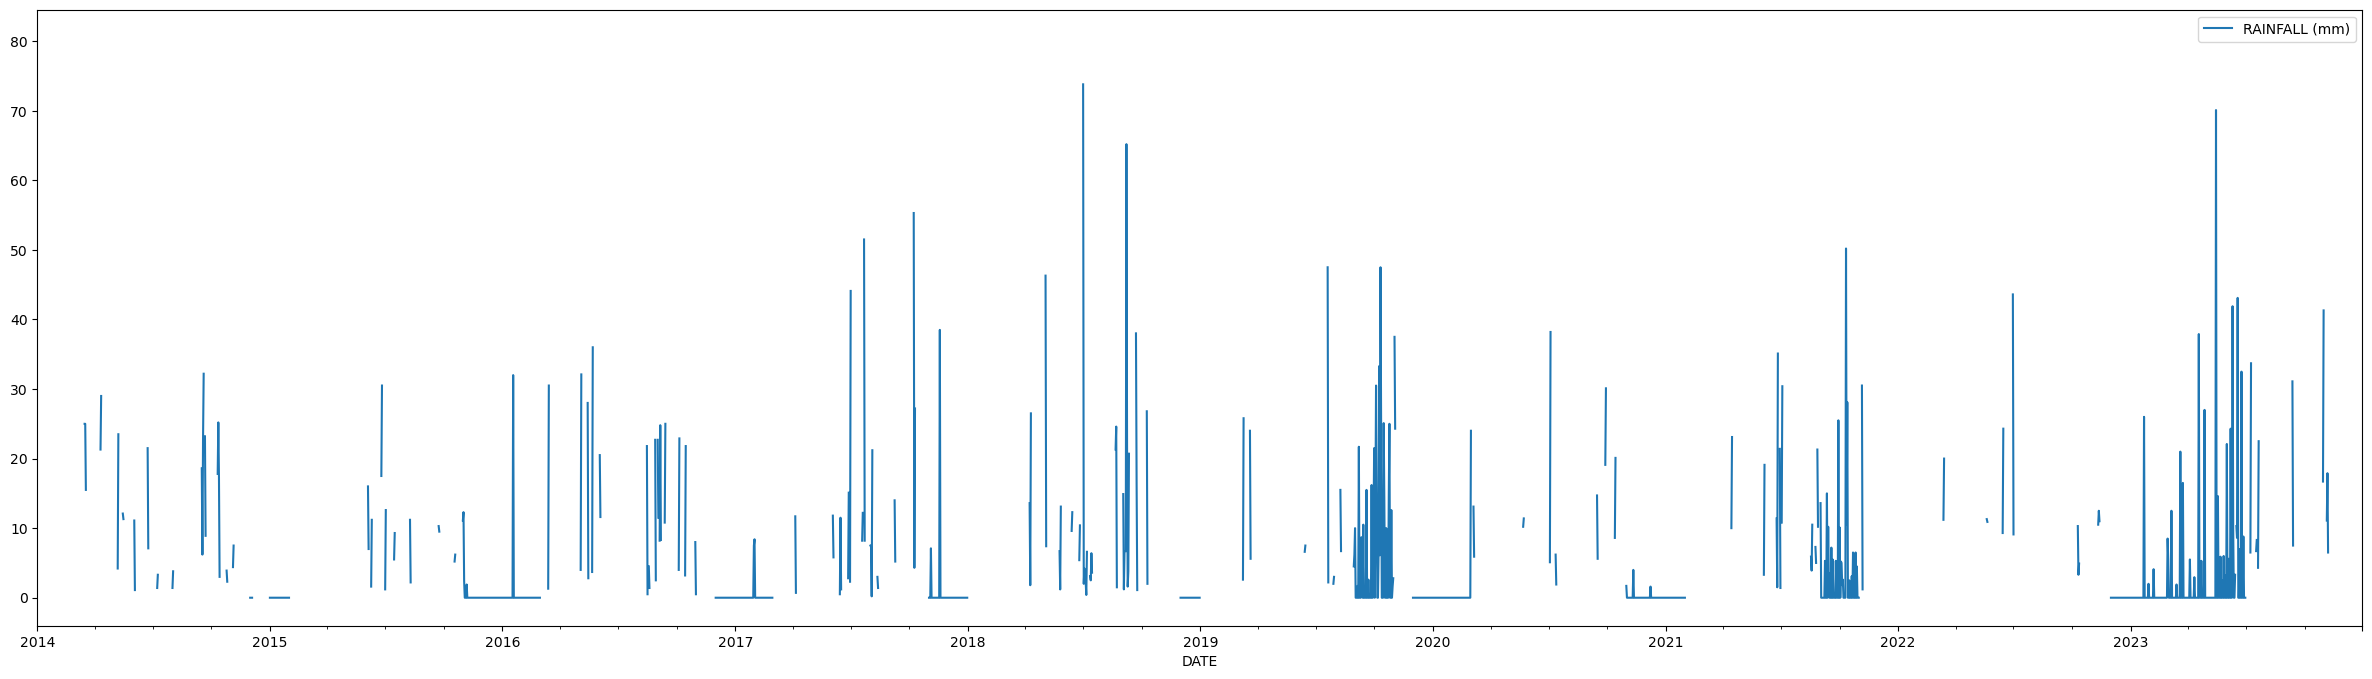

In [46]:
data['RAINFALL (mm)'] = pd.to_numeric(data['RAINFALL (mm)'], errors='coerce')
data.plot(x='DATE', y='RAINFALL (mm)', figsize=(30,8))


<Axes: xlabel='DATE'>

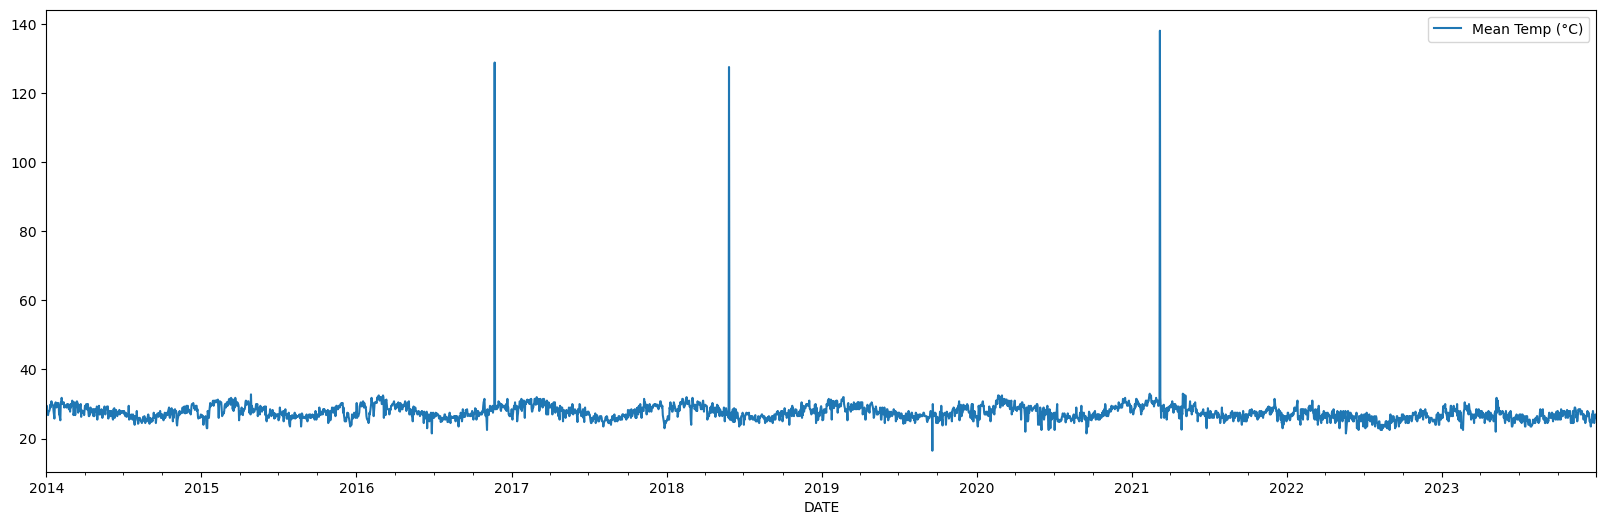

In [47]:
data['Mean Temp (°C)'] = pd.to_numeric(data['Mean Temp (°C)'], errors='coerce')
data.plot(x='DATE', y='Mean Temp (°C)', figsize=(20,6))

<Axes: xlabel='DATE'>

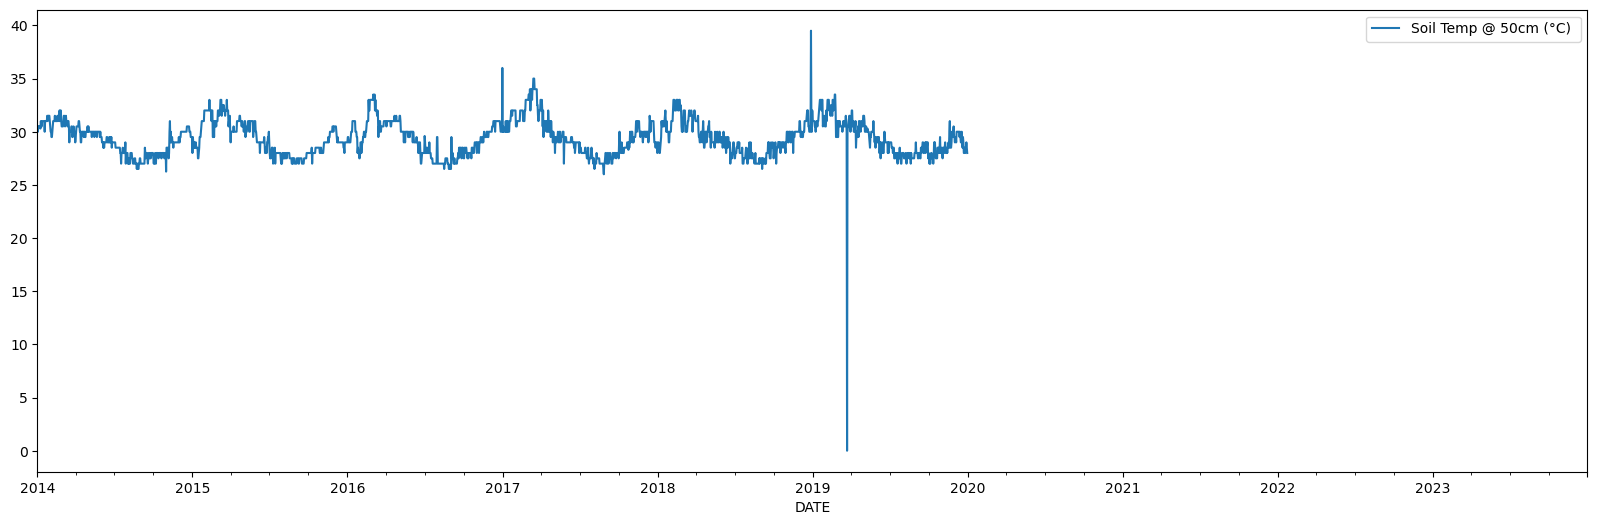

In [48]:
data['Soil Temp @ 50cm (°C) '] = pd.to_numeric(data['Soil Temp @ 50cm (°C) '], errors='coerce')
data.plot(x='DATE', y='Soil Temp @ 50cm (°C) ', figsize=(20,6))

<Axes: xlabel='DATE'>

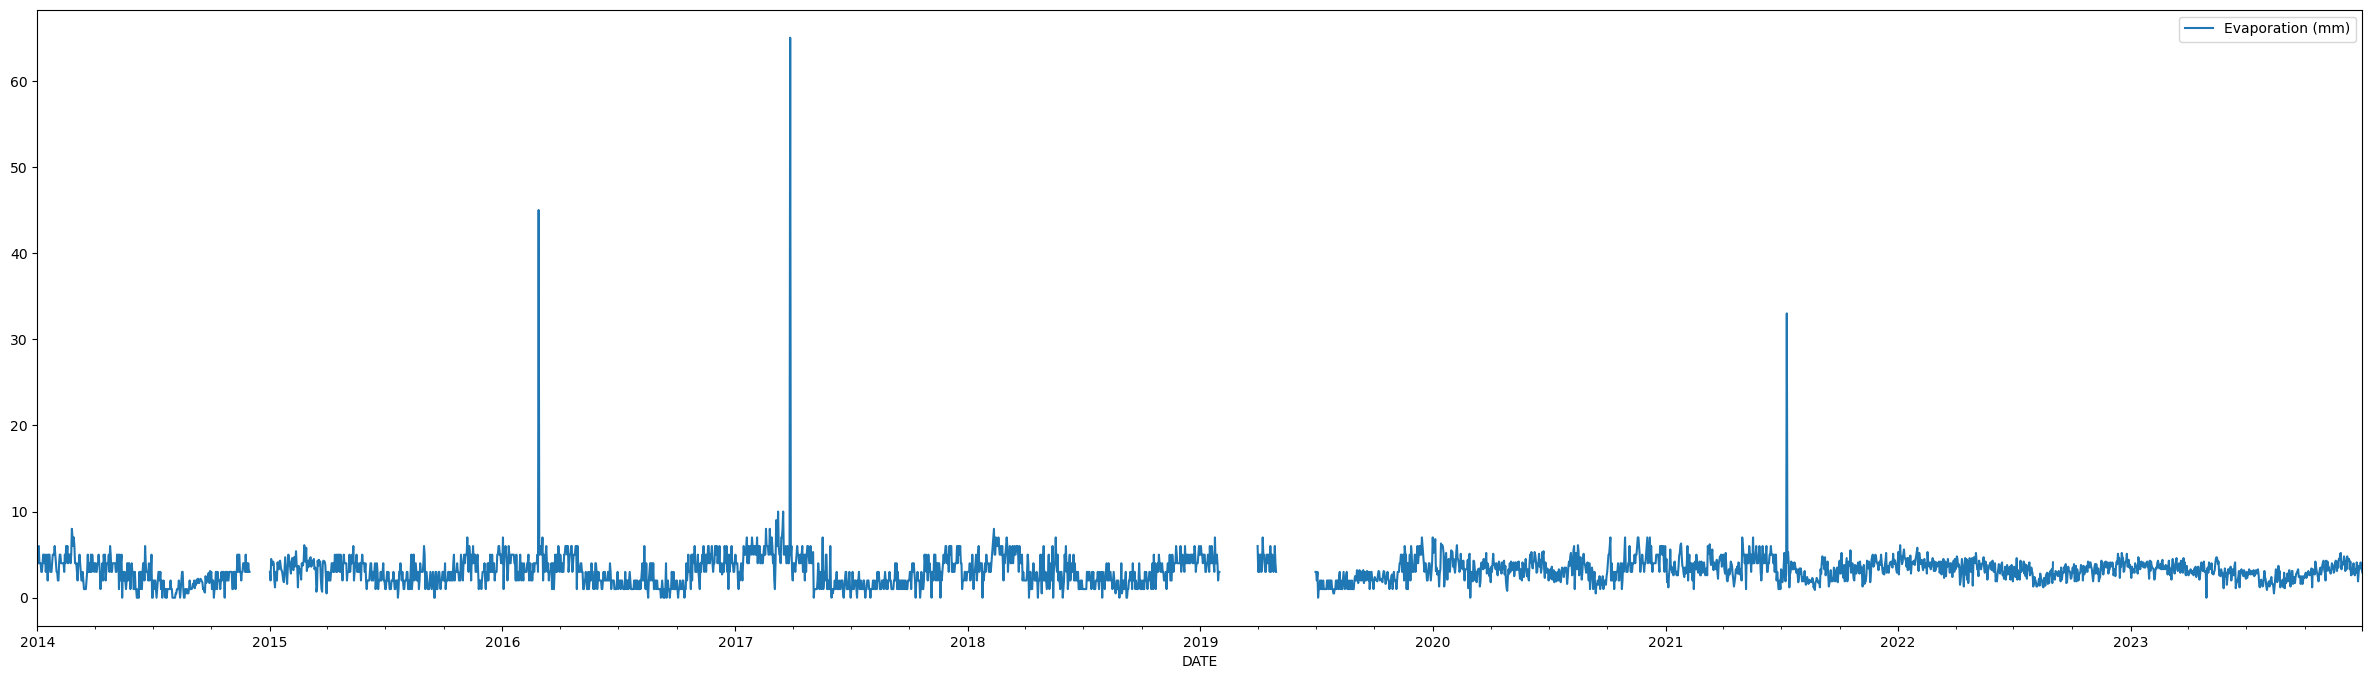

In [49]:
data['Evaporation (mm)'] = pd.to_numeric(data['Evaporation (mm)'], errors='coerce')
data.plot(x='DATE', y='Evaporation (mm)', figsize=(30,8))

In [50]:
#check data shape
(data.shape)

(3652, 11)

In [51]:
(data.columns)



Index(['DATE', 'RAINFALL (mm)', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Soil Temp @ 50cm (°C) ', 'Sunshine Hours',
       'Evaporation (mm)', 'year', 'month', 'day'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    3652 non-null   datetime64[ns]
 1   RAINFALL (mm)           1512 non-null   float64       
 2   Max Temp (°C)           3652 non-null   float64       
 3   Min Temp (°C)           3652 non-null   float64       
 4   Mean Temp (°C)          3652 non-null   float64       
 5   Soil Temp @ 50cm (°C)   2190 non-null   float64       
 6   Sunshine Hours          3652 non-null   object        
 7   Evaporation (mm)        3500 non-null   float64       
 8   year                    3652 non-null   int32         
 9   month                   3652 non-null   int32         
 10  day                     3652 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 271.2+ KB


In [53]:
#replaced missing values with 0 in RAINFALL (mm) column 
data['RAINFALL (mm)'] = data['RAINFALL (mm)'].fillna(0)

In [54]:
#check missing values
data.isna().sum()

DATE                         0
RAINFALL (mm)                0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Soil Temp @ 50cm (°C)     1462
Sunshine Hours               0
Evaporation (mm)           152
year                         0
month                        0
day                          0
dtype: int64

In [55]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [56]:
#droppped this column for having more than 50% as missing values
data = data.drop('Soil Temp @ 50cm (°C) ', axis=1)


In [57]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [58]:
# Calculate the median value for each month
median_per_month = data.groupby('month')['Evaporation (mm)'].median()

# Iterate over the rows of the dataframe
for index, row in data.iterrows():
    # Check if the value is missing
    if pd.isnull(row['Evaporation (mm)']):
        # Get the month of the current row
        month = row['month']
        # Fill in the missing value with the median value for that month
        data.at[index, 'Evaporation (mm)'] = median_per_month[month]

In [59]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [60]:
#rechecked for missing values correctly dealt with
data.isna().sum()

DATE                0
RAINFALL (mm)       0
Max Temp (°C)       0
Min Temp (°C)       0
Mean Temp (°C)      0
Sunshine Hours      0
Evaporation (mm)    0
year                0
month               0
day                 0
dtype: int64

<Axes: xlabel='DATE'>

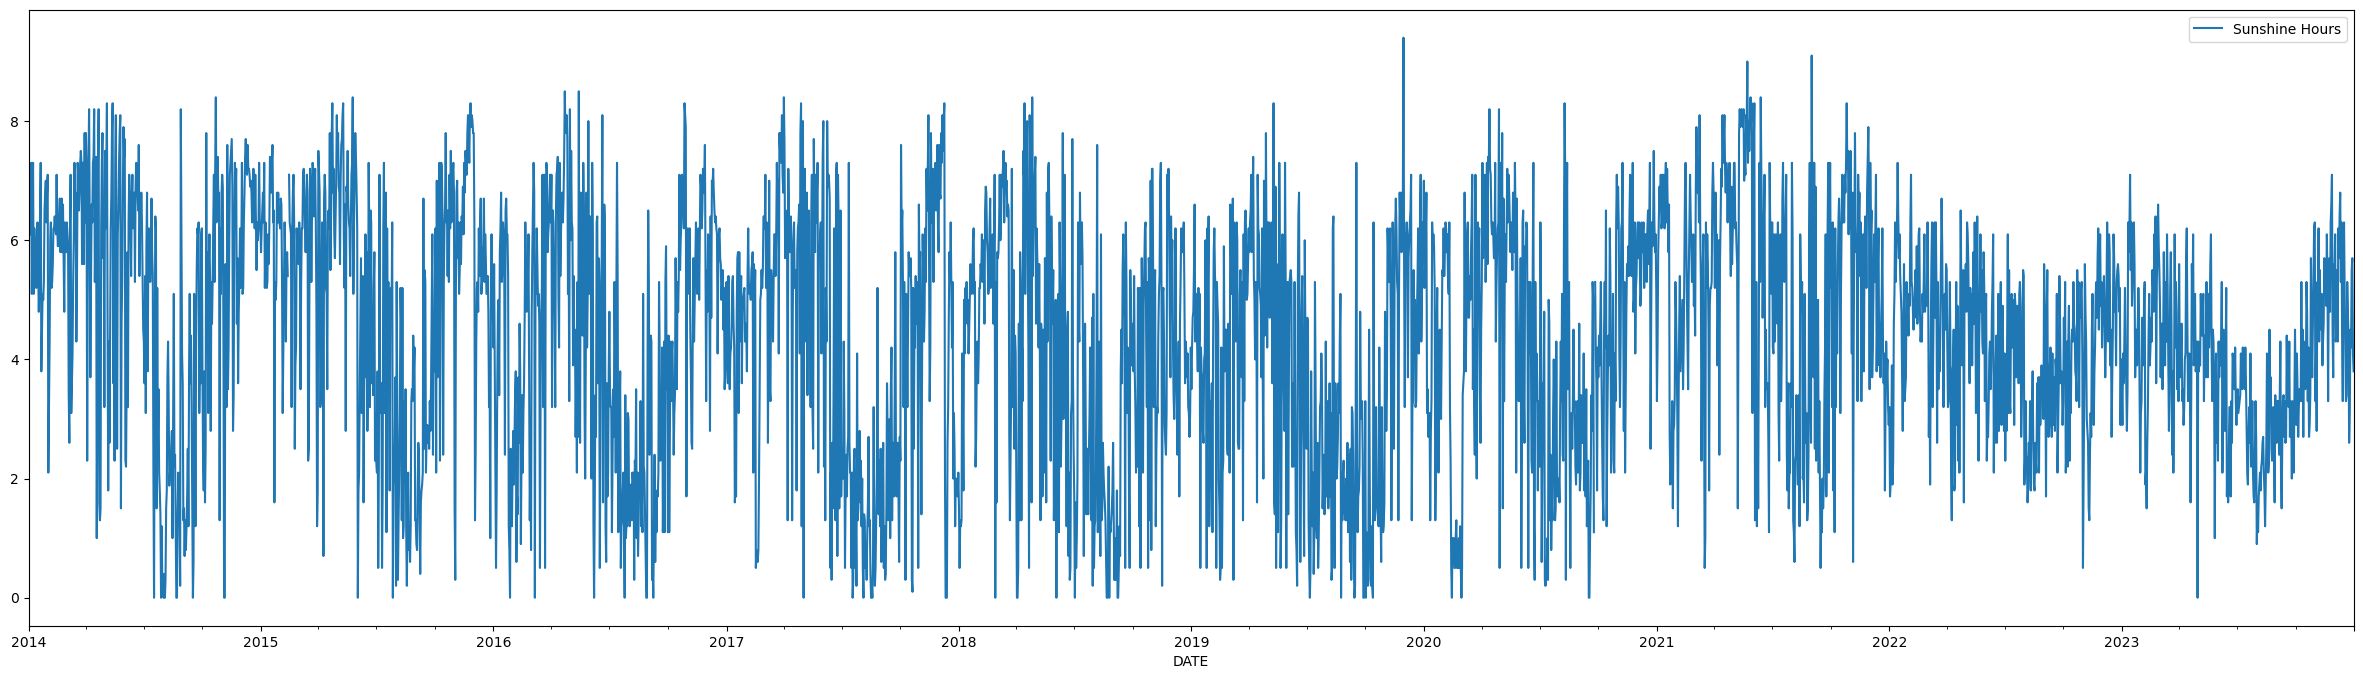

In [61]:
data['Sunshine Hours'] = pd.to_numeric(data['Sunshine Hours'], errors='coerce')
data.plot(x='DATE', y='Sunshine Hours', figsize=(30,8))

Seasonality and Trends

c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

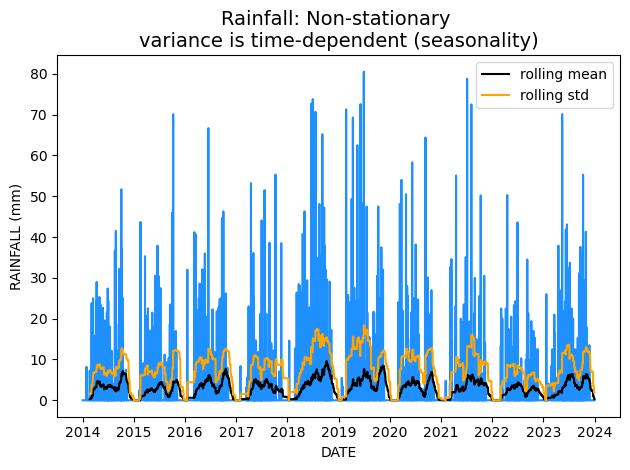

In [62]:
#plot series to check for trends and seasonality
rolling_window = 52
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'], color='dodgerblue')
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'].rolling(rolling_window).std(), color='orange', label='rolling std')
plt.title('Rainfall: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
plt.tight_layout()
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller

# Extract the "RAINFALL" column from the DataFrame
rainfall_data = data["RAINFALL (mm)"]

# Perform the Augmented Dickey-Fuller test
result = adfuller(rainfall_data)

# Extract the p-value from the test result
p_value = result[1]

# Check the p-value to determine stationarity
if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

The data is stationary.


Modelling with Facebook Prophet

22:26:10 - cmdstanpy - INFO - Chain [1] start processing
22:26:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


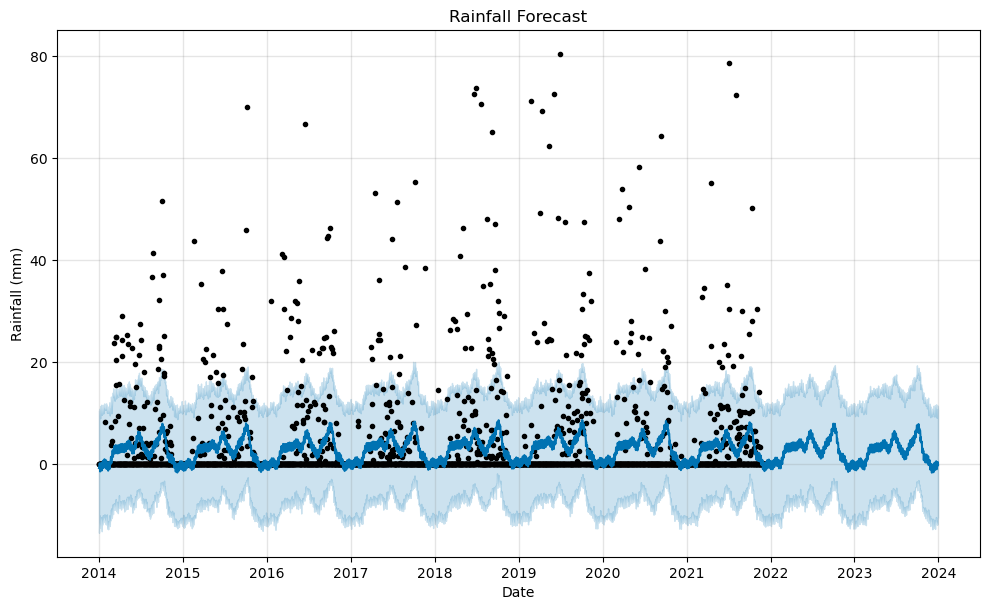

c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

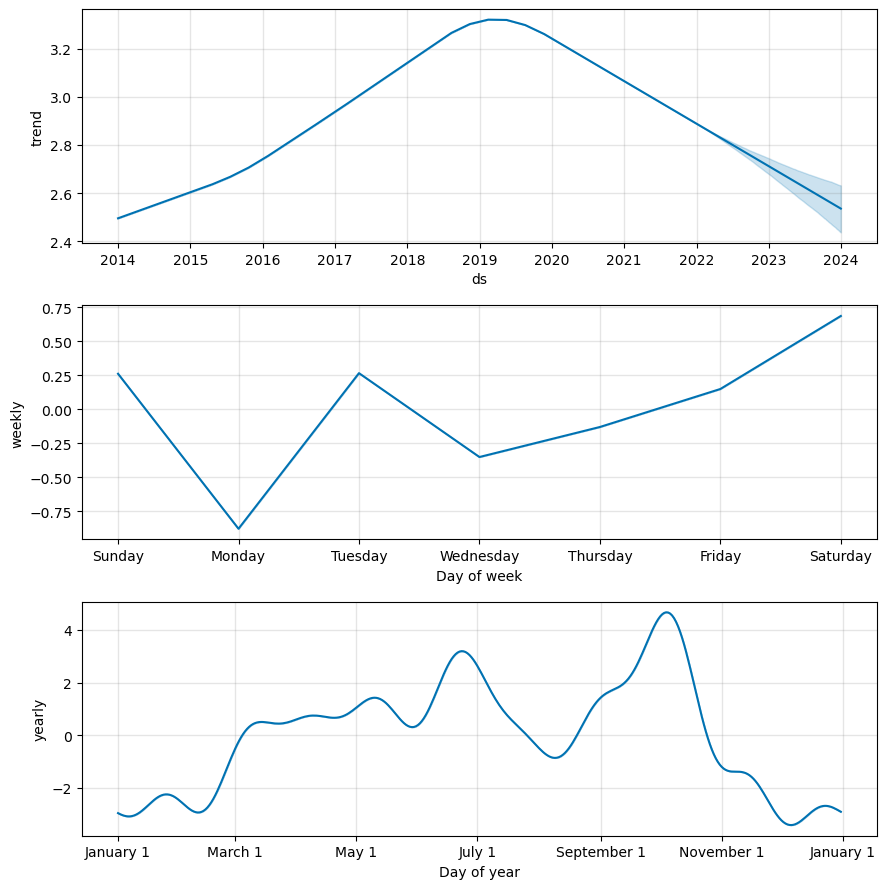

              y      yhat  yhat_lower  yhat_upper
ds                                               
2023-08-07  0.0  0.913267  -10.182718   11.172714
2023-08-08  0.0  2.027125   -9.294264   12.854902
2023-08-09  0.0  1.396220   -9.997772   12.665491
2023-08-10  0.0  1.615302   -9.095754   12.078810
2023-08-11  0.0  1.907642   -8.443929   13.413865
...         ...       ...         ...         ...
2023-12-27  0.0 -0.542469  -11.900222   10.903584
2023-12-28  0.0 -0.354570  -11.156042   10.858731
2023-12-29  0.0 -0.113441  -11.823088   11.048836
2023-12-30  0.0  0.381242  -10.536633   11.458786
2023-12-31  0.0 -0.086003  -10.550907   10.463300

[147 rows x 4 columns]


In [64]:
from prophet import Prophet

# Rename columns for Prophet
df = data.rename(columns={'DATE': 'ds', 'RAINFALL (mm)': 'y'})

# Split data into training (80%), testing (16%), and validation (4%) sets
train_size = 0.80
test_size = 0.16
validation_size = 0.04

train_end = int(train_size * len(df))
test_end = int((train_size + test_size) * len(df))

train_df = df.iloc[:train_end]
test_df = df.iloc[train_end:test_end]
validation_df = df.iloc[test_end:]

# Initialize and fit the Prophet model on the training set
model = Prophet ()
model.fit(train_df)

# Create a dataframe for future dates including the test and validation periods
future = model.make_future_dataframe(periods=len(test_df) + len(validation_df))

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Rainfall Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

# Plot trend and seasonality components
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate the model on the validation set
# Adjusting to ensure correct slicing and concatenation
validation_forecast = forecast.iloc[-len(validation_df):]
validation_df = validation_df.set_index('ds')
validation_forecast = validation_forecast.set_index('ds')
validation_results = pd.concat([validation_df, validation_forecast[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)

# Print the validation results
print(validation_results[['y', 'yhat', 'yhat_lower', 'yhat_upper']])

In [65]:
#Baseline Model

from sklearn.metrics import mean_absolute_error, mean_squared_error
# Compute MAE and RMSE metrics
mae = mean_absolute_error(validation_results['y'], validation_results['yhat'])
rmse = np.sqrt(mean_squared_error(validation_results['y'], validation_results['yhat']))
mpe = np.mean((validation_results['y'] - validation_results['yhat']) / validation_results['y']) * 100

# Print the validation results and the metrics
print(validation_results[['y', 'yhat', 'yhat_lower', 'yhat_upper']])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Percentage Error (MPE): {mpe}%")

              y      yhat  yhat_lower  yhat_upper
ds                                               
2023-08-07  0.0  0.913267  -10.182718   11.172714
2023-08-08  0.0  2.027125   -9.294264   12.854902
2023-08-09  0.0  1.396220   -9.997772   12.665491
2023-08-10  0.0  1.615302   -9.095754   12.078810
2023-08-11  0.0  1.907642   -8.443929   13.413865
...         ...       ...         ...         ...
2023-12-27  0.0 -0.542469  -11.900222   10.903584
2023-12-28  0.0 -0.354570  -11.156042   10.858731
2023-12-29  0.0 -0.113441  -11.823088   11.048836
2023-12-30  0.0  0.381242  -10.536633   11.458786
2023-12-31  0.0 -0.086003  -10.550907   10.463300

[147 rows x 4 columns]
Mean Absolute Error (MAE): 4.376276069759415
Root Mean Squared Error (RMSE): 8.271342493763285
Mean Percentage Error (MPE): nan%


c:\Users\Kent\Anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [66]:
data.describe()

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
count,3652,3652.000000,3652.000000,3652.000000,3652.000000,3650.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,2018-12-31 12:00:00,2.894890,32.257640,22.898576,27.586993,4.391940,3.219606,2018.499726,6.523549,15.727820
min,2014-01-01 00:00:00,0.000000,10.000000,14.000000,16.500000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,2016-07-01 18:00:00,0.000000,30.000000,22.000000,26.300000,2.800000,2.000000,2016.000000,4.000000,8.000000
50%,2018-12-31 12:00:00,0.000000,32.000000,23.000000,27.500000,4.600000,3.000000,2018.500000,7.000000,16.000000
75%,2021-07-01 06:00:00,0.000000,34.000000,24.000000,29.000000,6.100000,4.000000,2021.000000,10.000000,23.000000
max,2023-12-31 00:00:00,80.500000,40.000000,244.000000,138.000000,9.400000,65.000000,2023.000000,12.000000,31.000000
std,NaN,8.615084,2.831758,6.240527,3.510197,2.041649,1.939978,2.872293,3.449005,8.800529


In [67]:
list_2 = []
for i in list(data['Evaporation (mm)']):
    if i > 10:
        i = 10.0
    list_2.append(i)
print(list_2)

data['Evaporation (mm)'] = list_2

[4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 2.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0, 6.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 4.0, 6.0, 5.0, 6.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 8.0, 7.0, 6.0, 7.0, 6.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 4.0, 5.0, 4.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 2.0, 5.0, 4.0, 5.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 5.0, 1.0, 5.0, 2.0, 4.0, 5.0, 0.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 3.0, 1.0, 3.0, 4.0, 3.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 4.0, 4.0, 2.0, 6.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 5.0, 0.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0,

In [68]:
mean_temp_list = []
for i in list(data['Mean Temp (°C)']):
    if i > 33:
        i = 33.5
    mean_temp_list.append(i)
data['Mean Temp (°C)'] = mean_temp_list

In [69]:
min_temp_list = []
for i in list(data['Min Temp (°C)']):
    if i > 31:
        i = 27
    min_temp_list.append(i)

data['Min Temp (°C)'] = min_temp_list

In [70]:
data.describe()

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
count,3652,3652.000000,3652.000000,3652.000000,3652.000000,3650.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,2018-12-31 12:00:00,2.894890,32.257640,22.731818,27.506544,4.391940,3.188664,2018.499726,6.523549,15.727820
min,2014-01-01 00:00:00,0.000000,10.000000,14.000000,16.500000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,2016-07-01 18:00:00,0.000000,30.000000,22.000000,26.300000,2.800000,2.000000,2016.000000,4.000000,8.000000
50%,2018-12-31 12:00:00,0.000000,32.000000,23.000000,27.500000,4.600000,3.000000,2018.500000,7.000000,16.000000
75%,2021-07-01 06:00:00,0.000000,34.000000,24.000000,29.000000,6.100000,4.000000,2021.000000,10.000000,23.000000
max,2023-12-31 00:00:00,80.500000,40.000000,31.000000,33.500000,9.400000,10.000000,2023.000000,12.000000,31.000000
std,NaN,8.615084,2.831758,1.899064,1.861345,2.041649,1.426145,2.872293,3.449005,8.800529


In [71]:
from prophet import Prophet

# Rename columns for Prophet
df = data.rename(columns={'DATE': 'ds', 'RAINFALL (mm)': 'y'})

# Split data into training (80%), testing (16%), and validation (4%) sets
train_size = 0.80
test_size = 0.16
validation_size = 0.04

train_end = int(train_size * len(df))
test_end = int((train_size + test_size) * len(df))

train_df = df.iloc[:train_end]
test_df = df.iloc[train_end:test_end]
validation_df = df.iloc[test_end:]

# Initialize and fit the Prophet model on the training set
model = Prophet ()
model.fit(train_df)

# Create a dataframe for future dates including the test and validation periods
future = model.make_future_dataframe(periods=len(test_df) + len(validation_df))

# Predict future values
forecast = model.predict(future)

# # Plot the forecast
# fig1 = model.plot(forecast)
# plt.title('Rainfall Forecast')
# plt.xlabel('Date')
# plt.ylabel('Rainfall (mm)')
# plt.show()

# Plot trend and seasonality components
# fig2 = model.plot_components(forecast)
# plt.show()

# Evaluate the model on the validation set
# Adjusting to ensure correct slicing and concatenation
validation_forecast = forecast.iloc[len(validation_df):]
validation_df = validation_df.set_index('ds')
validation_forecast = validation_forecast.set_index('ds')
result = pd.concat([validation_df, validation_forecast[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)

# Print the validation results
print(result[['y', 'yhat', 'yhat_lower', 'yhat_upper']])

22:26:23 - cmdstanpy - INFO - Chain [1] start processing
22:26:24 - cmdstanpy - INFO - Chain [1] done processing


              y      yhat  yhat_lower  yhat_upper
ds                                               
2014-05-28  NaN  2.514882   -8.379651   13.832798
2014-05-29  NaN  2.717762   -8.768967   13.716216
2014-05-30  NaN  2.997766   -8.349239   14.087544
2014-05-31  NaN  3.554588   -7.154604   14.318739
2014-06-01  NaN  3.171575   -9.073235   14.300874
...         ...       ...         ...         ...
2023-12-27  0.0 -0.542469  -12.142529   10.512910
2023-12-28  0.0 -0.354570  -11.881612   11.037788
2023-12-29  0.0 -0.113441  -10.784622   10.800437
2023-12-30  0.0  0.381242  -10.882536   11.687217
2023-12-31  0.0 -0.086003  -11.122889   11.699778

[3505 rows x 4 columns]


In [72]:
# #Baseline Model

# from sklearn.metrics import mean_absolute_error, mean_squared_error
# # Compute MAE and RMSE metrics
# mae = mean_absolute_error(result['y'], result['yhat'])
# rmse = np.sqrt(mean_squared_error(result['y'], result['yhat']))
# mpe = np.mean((result['y'] - result['yhat']) / result['y']) * 100

# # Print the validation results and the metrics
# print(result[['y', 'yhat', 'yhat_lower', 'yhat_upper']])
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Percentage Error (MPE): {mpe}%")

In [77]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data setup (Ensure your 'data' dataframe is already defined)
# df = pd.read_csv('your_data.csv')

# Rename columns for Prophet
df = data.rename(columns={'DATE': 'ds', 'RAINFALL (mm)': 'y'})

# Split data into training (80%), testing (16%), and validation (4%) sets
train_size = 0.80
test_size = 0.16
validation_size = 0.04

train_end = int(train_size * len(df))
test_end = int((train_size + test_size) * len(df))

train_df = df.iloc[:train_end]
test_df = df.iloc[train_end:test_end]
validation_df = df.iloc[test_end:]

# Initialize and fit the Prophet model on the training set
model = Prophet()
model.fit(train_df)

# Create a dataframe for future dates including the test and validation periods
# Note: Only the number of periods is passed to make_future_dataframe
future_periods = len(test_df) + len(validation_df)
future = model.make_future_dataframe(periods=future_periods)

# Predict future values
forecast = model.predict(future)

# Extract the forecasted values for the test period
forecast_test = forecast.iloc[train_end:train_end + len(test_df)]
predicted = forecast_test['yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_df['y'], predicted))

# Calculate MAE
mae = mean_absolute_error(test_df['y'], predicted)

# Calculate Mean Percentage Error (MPE)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

mpe = mean_percentage_error(test_df['y'].values, predicted)
print(f'RMSE: {rmse} \n MAE: {mae} \n Mean Percentage Error (MPE): {mpe:.2f}%')


22:50:12 - cmdstanpy - INFO - Chain [1] start processing
22:50:13 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 6.962338023561673 
 MAE: 3.8919195338915133 
 Mean Percentage Error (MPE): nan%


C:\Users\Kent\AppData\Local\Temp\ipykernel_16828\1766835561.py:48: RuntimeWarning: divide by zero encountered in divide
  return np.mean((y_true - y_pred) / y_true) * 100
c:\Users\Kent\Anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


## Export to csv for safe keeping

In [74]:
# # Export the DataFrame to a CSV file
# df.to_csv('outlier_removed.csv', index=False)